Cho bộ dữ liệu ngẫu nhiên Y1, Y2, . . . , Yn cuả biến ngẫu nhiên Y . Quy trình bootstrap cho trung bình mẫu được trình bày như sau:
1. Tạo một mẫu ngẫu nhiên Y1∗,Y2∗,...,Yn∗ (cùng với cỡ của dữ liệu gốc) từ dữ liệu gốc, có lặp lại (with replacement).
∗
của mẫu vừa tạo.
3. Lặp lại bước 1 và 2 trong R lần (ít nhất 1000 lần), và lưu kết quả lại.

In [1]:
library(ggplot2)
library(boot)

In [2]:
base_path <- getwd()
setwd(base_path)
set.seed(42)

In [3]:
# data_birth <- read_table(file = "datasets/birthwt.txt")


# BÀI TẬP 1

In [4]:
# Đường dẫn lưu trữ dữ liệu
path <- paste(base_path, "../datasets/birthwt.txt", sep = "/")
data_birth <- read.table(file = path, header = TRUE)

In [5]:
# glimpse(data_birth)

In [6]:
head(data_birth)

,low,age,lwt,race,smoke,ptl,ht,ui,ftv,bwt
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,19,182,2,0,0,0,1,0,2523
2,0,33,155,3,0,0,0,0,3,2551
3,0,20,105,1,1,0,0,0,1,2557
4,0,21,108,1,1,0,0,1,2,2594
5,0,18,107,1,1,0,0,1,0,2600
6,0,21,124,3,0,0,0,0,0,2622


In [7]:
mean(data_birth$bwt)

[1] 2944.656

In [8]:
n_bwt <- nrow(data_birth)
nR <- 1000
mu_bwt_boot <- numeric(nR)
for (i in 1:nR) {
id_boot <- sample(1:n_bwt, size = n_bwt, replace = TRUE)
bwt_boot <- data_birth$bwt[id_boot]
mu_bwt_boot[i] <- mean(bwt_boot)
}
# mu_bwt_boot

In [9]:
mean(mu_bwt_boot)

[1] 2946.393

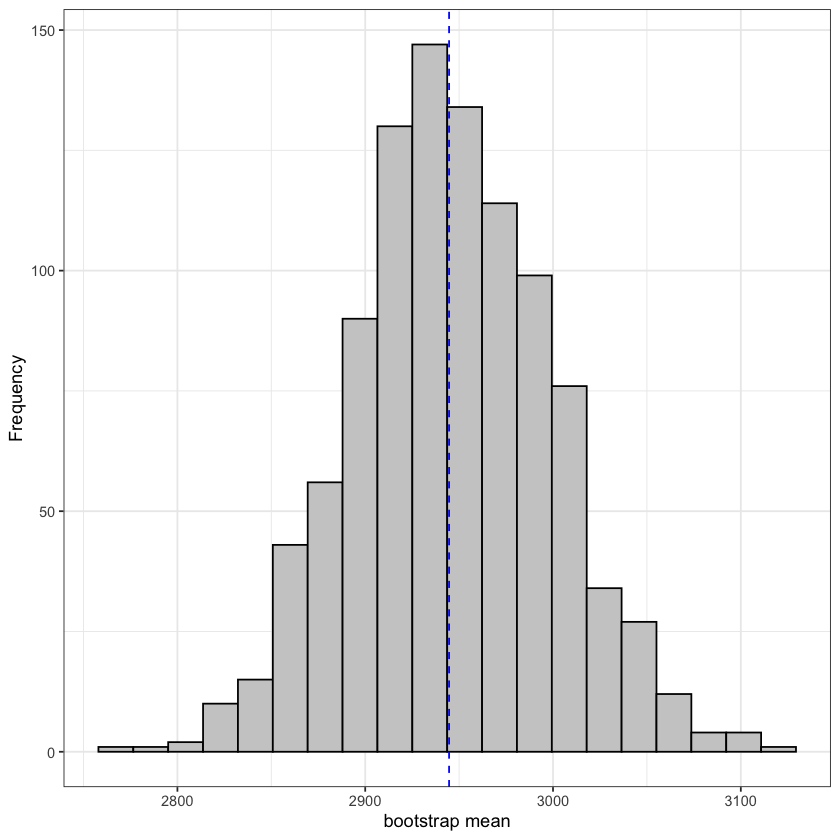

In [10]:
ggplot(data = data.frame(t = mu_bwt_boot), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = mean(data_birth$bwt), color = "blue",
linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [11]:
n_bwt <- nrow(data_birth)
nR <- 1000
mu_bwt_boot <- sapply(1:nR, function(x) {
  mean(data_birth$bwt[sample(1:n_bwt, size = n_bwt, replace = TRUE)])
})
# mu_bwt_boot

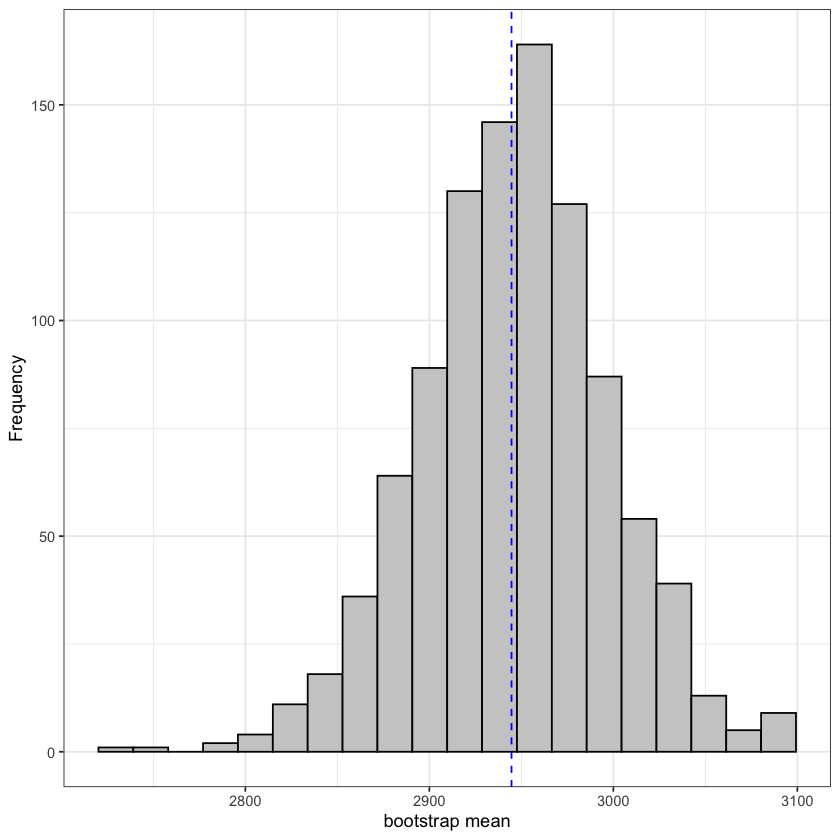

In [12]:
ggplot(data = data.frame(t = mu_bwt_boot), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = mean(data_birth$bwt), color = "blue",
linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [13]:
n_bwt <- nrow(data_birth)
nR <- 1000
median_bwt_boot <- sapply(1:nR, function(x) {
  median(data_birth$bwt[sample(1:n_bwt, size = n_bwt, replace = TRUE)])
})

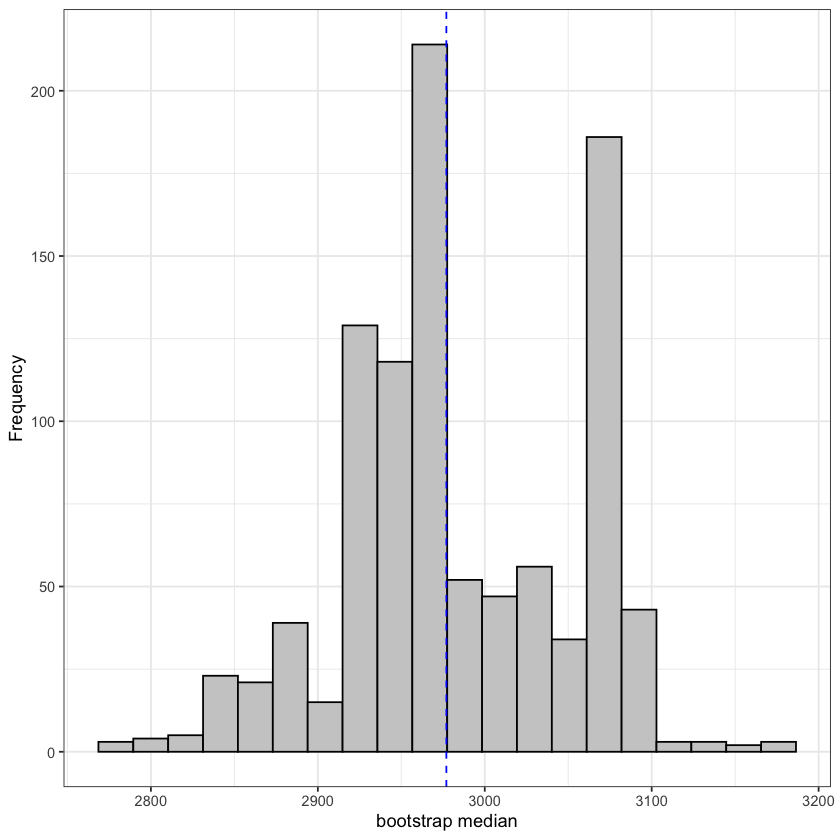

In [14]:
ggplot(data = data.frame(t = median_bwt_boot), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = median(data_birth$bwt), color = "blue",
linetype = "dashed") +
xlab("bootstrap median") + ylab("Frequency") +
theme_bw()

# BÀI TẬP 2

In [15]:
boot_mu_fun <- function(data, ind){
data_new <- data[ind]
out <- mean(data_new)
return(out)
}

In [16]:
set.seed(42)
out_1 <- boot(data = data_birth$bwt, statistic = boot_mu_fun, R = 1000)
out_1


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_birth$bwt, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original   bias    std. error
t1* 2944.656 1.736735    54.21587

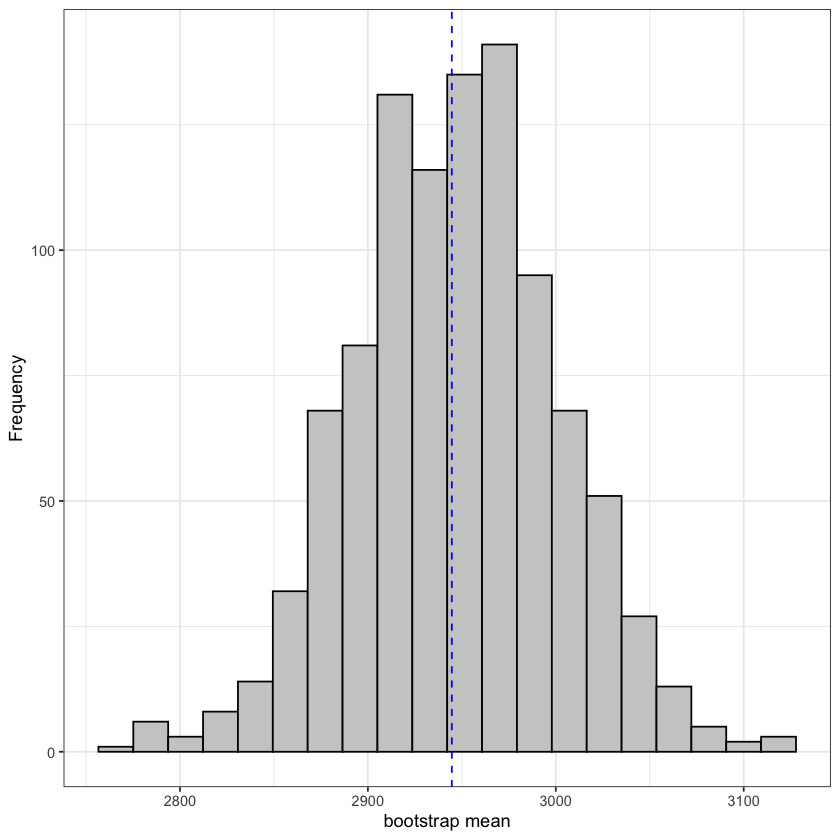

In [17]:
ggplot(data = data.frame(t = out_1$t), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_1$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [18]:
boot_median_fun <- function(data, ind){
data_new <- data[ind]
out <- median(data_new)
return(out)
}

In [19]:
set.seed(42)
out_1 <- boot(data = data_birth$bwt, statistic = boot_median_fun, R = 1000)
out_1


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_birth$bwt, statistic = boot_median_fun, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*     2977   6.238    68.91077

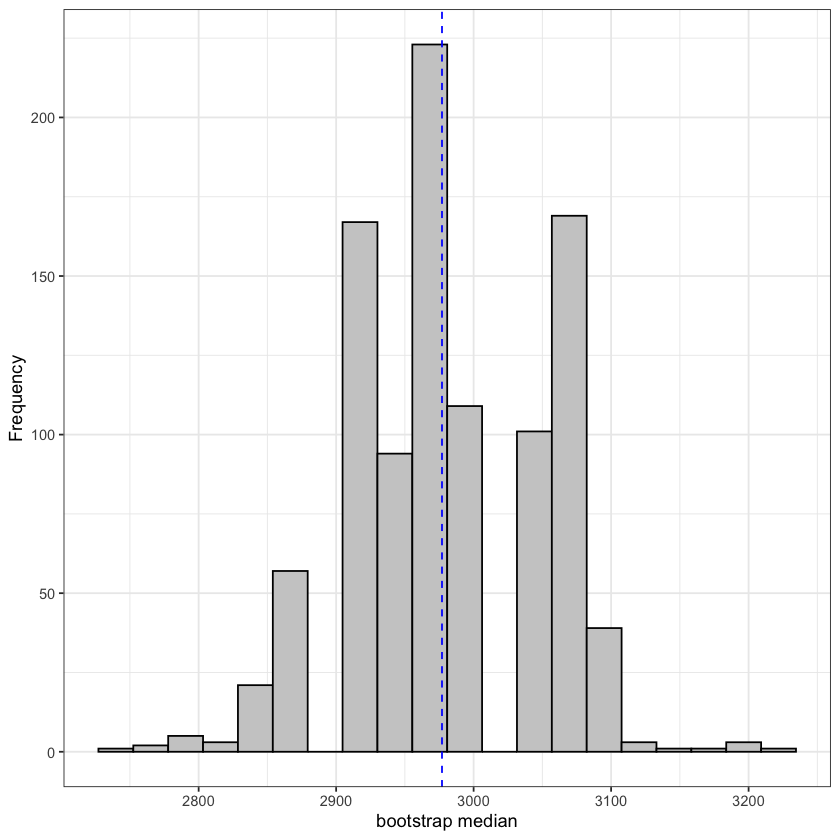

In [20]:
ggplot(data = data.frame(t = out_1$t), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_1$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap median") + ylab("Frequency") +
theme_bw()

# BÀI TẬP

## BÀI TẬP 1

In [21]:
set.seed(42)
out_1 <- boot(data = data_birth$lwt, statistic = boot_mu_fun, R = 1000)
out_1


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_birth$lwt, statistic = boot_mu_fun, R = 1000)


Bootstrap Statistics :
    original     bias    std. error
t1* 129.8148 0.02031217    2.233296

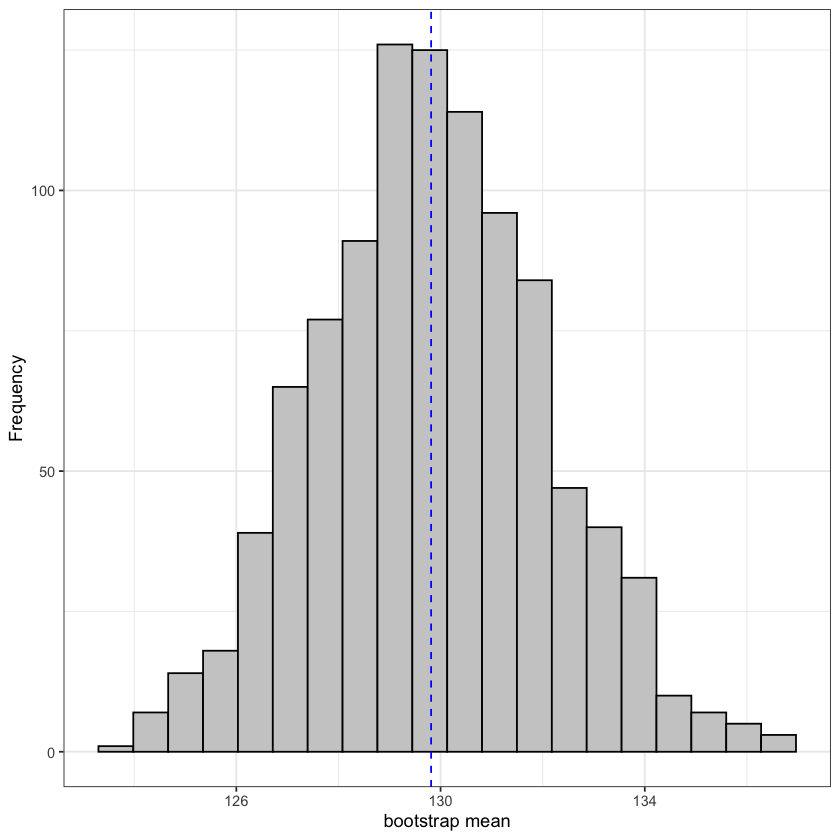

In [22]:
ggplot(data = data.frame(t = out_1$t), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_1$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [23]:
set.seed(42)
out_1 <- boot(data = data_birth$age, statistic = boot_median_fun, R = 1000)
out_1


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_birth$age, statistic = boot_median_fun, R = 1000)


Bootstrap Statistics :
    original  bias    std. error
t1*       23  -0.447   0.6415626

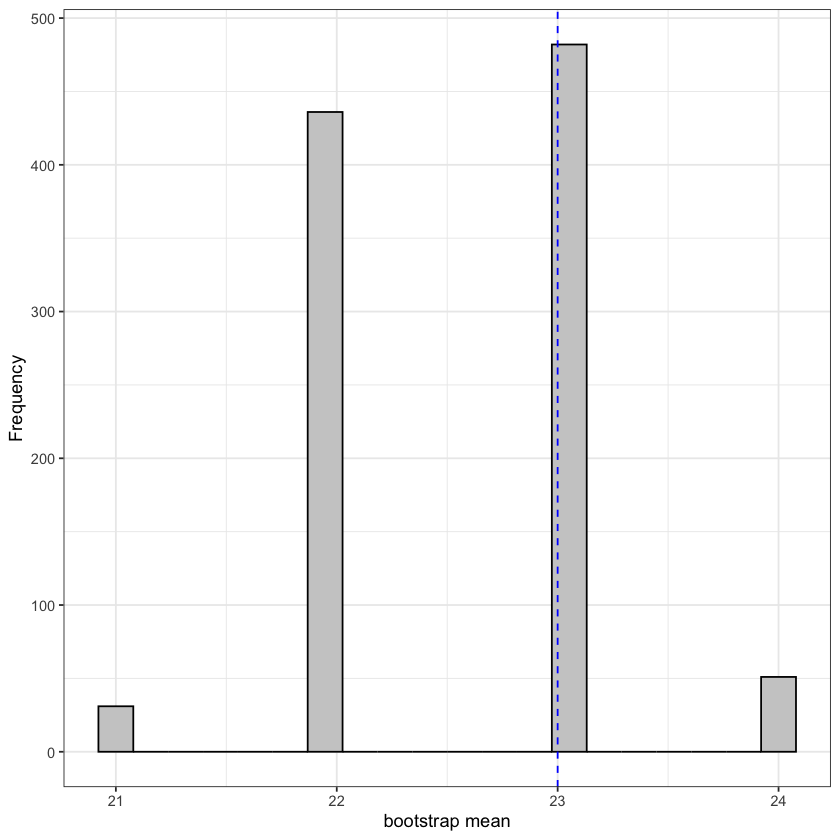

In [24]:
ggplot(data = data.frame(t = out_1$t), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_1$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

In [25]:
boot_cor_fun <- function(data, ind){
data_new <- data[ind, c("lwt", "bwt")]
out <- cor(data_new)
return(out)
}

In [26]:
set.seed(42)
out_1 <- boot(data = data_birth[, c("lwt", "bwt")], statistic = boot_cor_fun, R = 1000)
out_1


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_birth[, c("lwt", "bwt")], statistic = boot_cor_fun, 
    R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 1.0000000 0.0000000000  0.00000000
t2* 0.1857887 0.0008991973  0.06491167
t3* 0.1857887 0.0008991973  0.06491167
t4* 1.0000000 0.0000000000  0.00000000

In [27]:
ggplot(data = data.frame(t = out_1$t1), mapping = aes(x = t)) +
geom_histogram(fill = "gray80", color = "black", bins = 20) +
geom_vline(xintercept = out_1$t0, color = "blue", linetype = "dashed") +
xlab("bootstrap mean") + ylab("Frequency") +
theme_bw()

Don't know how to automatically pick scale for object of type <function>.
Defaulting to continuous.
ERROR while rich displaying an object: Error in `geom_histogram()`:
! Problem while computing aesthetics.
i Error occurred in the 1st layer.
Caused by error in `compute_aesthetics()`:
! Aesthetics are not valid data columns.
x The following aesthetics are invalid:
x `x = t`
i Did you mistype the name of a data column or forget to add `after_stat()`?

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if 